# KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

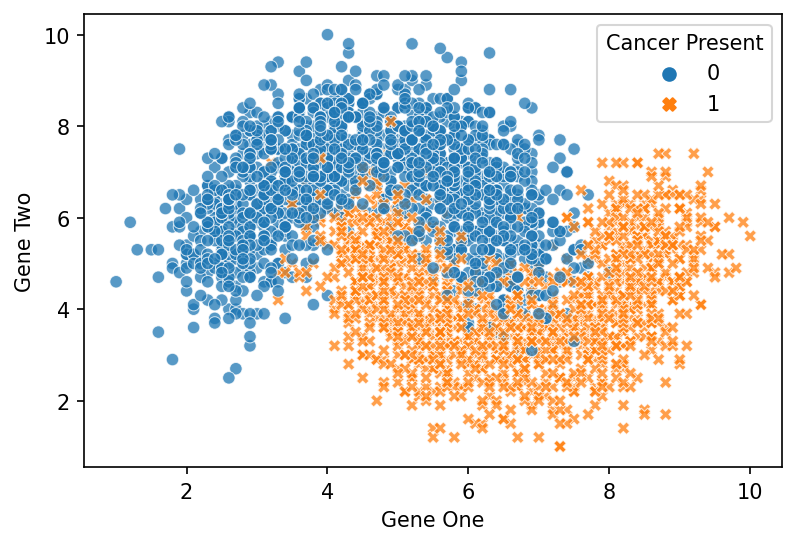

In [5]:
plt.figure(dpi=150)
sns.scatterplot(data=df, x = 'Gene One', y = 'Gene Two', 
                hue = 'Cancer Present', alpha = 0.75, style='Cancer Present' )

# plt.xlim(2, 6)
# plt.ylim(4, 8)

In [6]:
len(df)

3000

<Figure size 900x600 with 0 Axes>

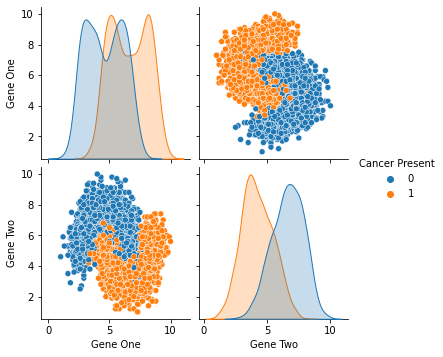

In [7]:
plt.figure(dpi=150)
sns.pairplot(data=df, hue='Cancer Present')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# df

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop('Cancer Present', axis=1)

In [12]:
y = df['Cancer Present']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)

In [16]:
scaled_X_test = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# help(KNeighborsClassifier)

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=6)

In [20]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [21]:
y_pred = knn_model.predict(scaled_X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
confusion_matrix(y_test, y_pred)

array([[449,  21],
       [ 37, 393]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       470
           1       0.95      0.91      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.93      0.94       900
weighted avg       0.94      0.94      0.94       900



In [25]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
# Elbow Method to Find the Best K
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1-accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)

In [28]:
test_error_rates

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Neighbors')

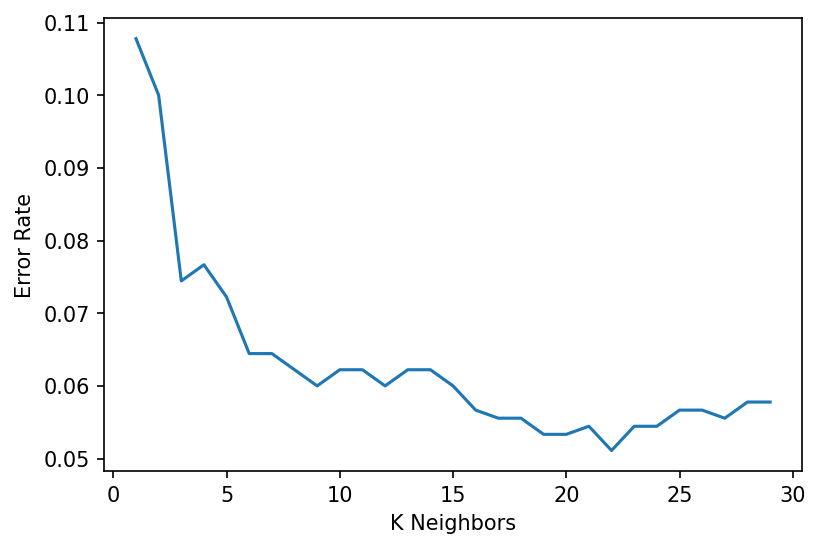

In [29]:
plt.figure(dpi=150)
plt.plot(range(1,30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

### PIPELINE --> GRID SEARCH CV

In [30]:
scaler = StandardScaler()

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [33]:
operations = [('scaler', scaler), ('knn', knn)]

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
pipe = Pipeline(operations)

In [36]:
from sklearn.model_selection import GridSearchCV

Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:*

chosen_string_name + two underscores + parameter key name

model_name + __ + parameter name

knn_model + __ + n_neighbors

knn_model__n_neighbors

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

In [37]:
k_values = list(range(1, 20))

In [38]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [39]:
param_grid = {'knn__n_neighbors':k_values}

In [40]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [41]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [42]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [43]:
full_pred = full_cv_classifier.predict(X_test)

In [44]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [45]:
new_patient = [[6.4, 3.8]]

In [46]:
full_cv_classifier.predict(new_patient)

array([1], dtype=int64)

In [47]:
full_cv_classifier.predict_proba(new_patient)

array([[0.28571429, 0.71428571]])